C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Data ke-1: Aktual = 4, Prediksi = 7, Persentase Error = 75.00%
Data ke-2: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-3: Aktual = 4, Prediksi = 7, Persentase Error = 75.00%
Data ke-4: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-5: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-6: Aktual = 7, Prediksi = 6, Persentase Error = 14.29%
Data ke-7: Aktual = 9, Prediksi = 7, Persentase Error = 22.22%
Data ke-8: Aktual = 9, Prediksi = 7, Persentase Error = 22.22%
Data ke-9: Aktual = 9, Prediksi = 7, Persentase Error = 22.22%
Data ke-10: Aktual = 8, Prediksi = 7, Persentase Error = 12.50%
Data ke-11: Aktual = 7, Prediksi = 6, Persentase Error = 14.29%
Data ke-12: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-13: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-14: Aktual = 8, Prediksi = 7, Persentase Error = 12.50%
Data ke-15: Aktual = 5, Prediksi = 6, Persentase Error = 20.00%
Data ke-16: Aktual = 8, Prediksi = 7, Persentase 

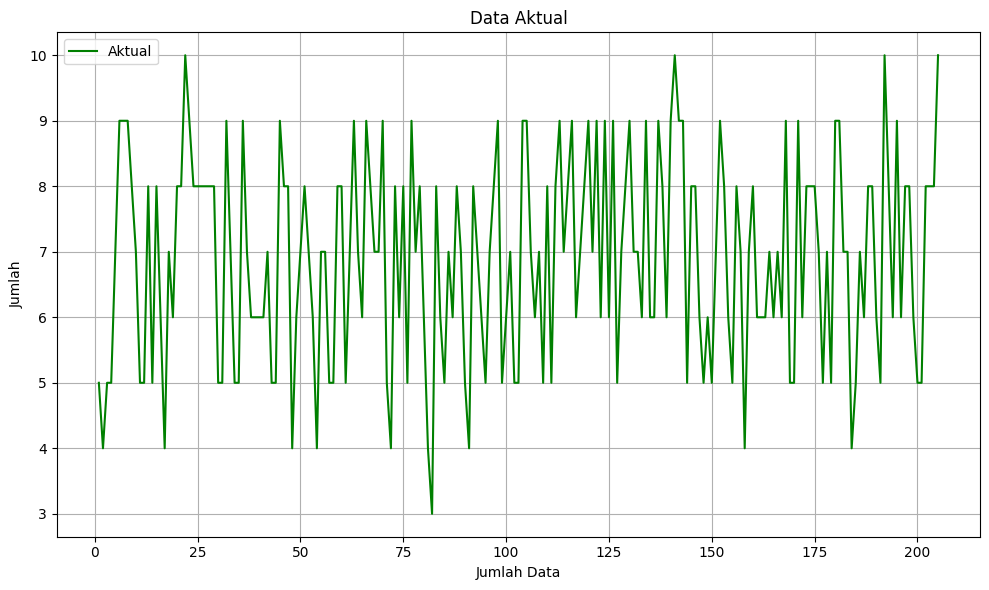

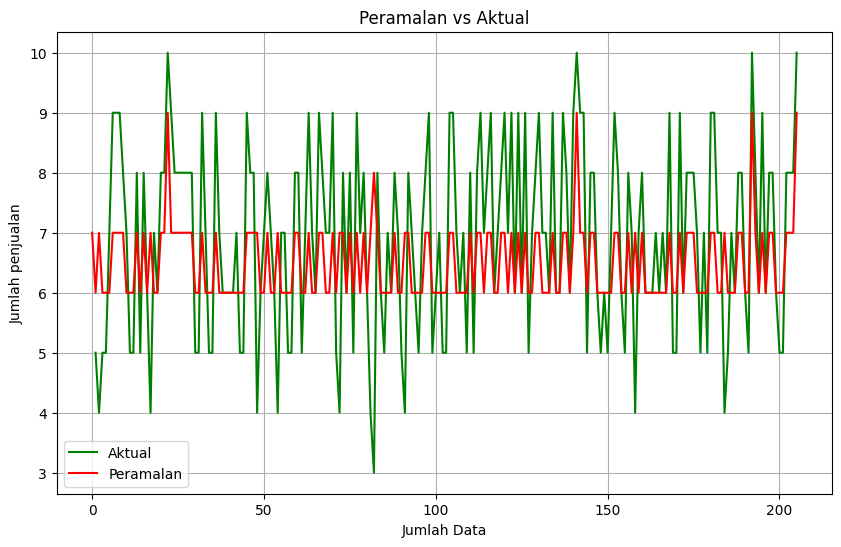

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from collections import Counter
import numpy as np

def Semesta(Data, D1, D2):
    semesta = [min(Data) - D1, max(Data) + D2]
    return semesta
    
def Interval(Data, D1, D2):
    rentang = (max(Data) + D2) - (min(Data) - D1)
    n = len(Data)
    K = 1 + 3.322 * math.log10(n)
    I = round(rentang / K)
    qtyInterval = round(rentang / I)
    return rentang, K, I, qtyInterval

def HimpunanFuzzy(I, qtyInterval, dmin):
    kelas = []
    bBawah = []
    bAtas = []
    nTengah = []
    nilai = dmin
    dataDict = {}
    for i in range(1, qtyInterval + 1):
        kelas.append("A" + str(i))
        batasBawah = nilai
        batasAtas = nilai + I
        nilaiTengah = (batasBawah + batasAtas) / 2
        bBawah.append(int(batasBawah))
        bAtas.append(int(batasAtas))
        nTengah.append(int(nilaiTengah))
        nilai = batasAtas
    for i in range(0, len(kelas)):
        dataDict[kelas[i]] = {"nilai": nTengah[i]}
    return kelas, bBawah, bAtas, nTengah, dataDict

def Fuzzifikasi(kelompok, kelas, data):
    fuzzifikasi = []
    for nilai in data:
        for i, k in enumerate(kelompok):
            if nilai < k:
                fuzzifikasi.append(kelas[i])
                break
    return fuzzifikasi

def FLR(fuzzifikasi):
    flr = []
    for i in range(len(fuzzifikasi)):
        if i < 1:
            flr.append(f">> {fuzzifikasi[i]}")
        else:
            flr.append(f"{fuzzifikasi[i-1]} >> {fuzzifikasi[i]}")
    return flr

def FLRG(data):
    dictFLRG = {}
    for i in range(len(data) - 1):
        current_state = data[i]
        next_state = data[i + 1]
        if current_state not in dictFLRG:
            dictFLRG[current_state] = []
        dictFLRG[current_state].append(next_state)
    for current_state, next_states in dictFLRG.items():
        dictFLRG[current_state] = list(next_states)  
    return dictFLRG

def Pembobotan(data):
    flrg = []
    bobot = []
    pembobotan = []
    for i in data:
        element_count = Counter(i)
        result = list(element_count.values())
        result2 = list(element_count.keys())
        bobot.append(result)
        flrg.append(result2)
        comper = [round((x / sum(result)), 2) for x in result]
        pembobotan.append(comper)
    return bobot, pembobotan , flrg

def Defuzzifikasi(flrgroup, bobot, newflrg):
    key = flrgroup.keys()
    list_key = list(key) 
    defuzzifikasi = []
    dictDefuzzifikasi = {}
    flrgnew = []
    for i in range(len(newflrg)):
        row = []
        for j in range(len(newflrg[i])):
            if newflrg[i][j] in dataDict:
                row.append(dataDict[newflrg[i][j]]['nilai'])
        flrgnew.append(row)
    for i in range(len(flrgnew)):
        row = []
        for j in range(len(flrgnew[i])):
            result = flrgnew[i][j] * bobot[i][j]
            row.append(round(result))
        defuzzifikasi.append(row)
    for i in range(len(defuzzifikasi)):
        dictDefuzzifikasi[list_key[i]] = sum(defuzzifikasi[i])
    return dictDefuzzifikasi

def Peramalan(fuzzifikasi, defuzzifikasi):
    peramalan = []
    for i in fuzzifikasi:
        peramalan.append(defuzzifikasi[i])
    return peramalan
    
def MAPE(actual_values, predicted_values): 
    actual_values, predicted_values = np.array(actual_values), np.array(predicted_values)
    n = len(actual_values)
    mape = (1/n) * sum(abs((actual_values[i] - predicted_values[i]) / actual_values[i]) * 100 for i in range(n))
    return mape
    
def calculate_percentage_error(actual, predicted):
    errors = []
    for i in range(len(actual)):
        error = abs((actual[i] - predicted[i]) / actual[i]) * 100
        errors.append(error)
    return errors
    
file_path = 'C:/Users/Lenovo/Documents/fts cheng/bismillah2.xlsx'
df = pd.read_excel(file_path)
time_series_column = 'MPW'
D1= 1
D2= 1

semesta = Semesta(df[time_series_column], D1=D1, D2=D2)
rentang, K, I, qty_interval = Interval(df[time_series_column], D1=D1, D2=D2)
kelas, bBawah, bAtas, nTengah, dataDict = HimpunanFuzzy(I, qty_interval, min(df[time_series_column]))
kelompok = bAtas
fuzzifikasi = Fuzzifikasi(kelompok, kelas, df[time_series_column])
flr = FLR(fuzzifikasi)
flr_grouped = FLRG(fuzzifikasi)
bobot, pembobotan, flrg = Pembobotan(flr_grouped.values())
defuzzifikasi= Defuzzifikasi(flr_grouped, pembobotan, flrg)
peramalan = Peramalan(fuzzifikasi, defuzzifikasi)
mape = MAPE(df[time_series_column], peramalan)
mape_percentage = f"{mape:.2f}%"
data_aktual = df[time_series_column]
data_prediksi = peramalan
errors = calculate_percentage_error(data_aktual, data_prediksi)
for i in range(len(data_aktual)):
    actual_value = data_aktual[i]
    predicted_value = data_prediksi[i]
    error = errors[i]
    print(f"Data ke-{i + 1}: Aktual = {actual_value}, Prediksi = {predicted_value}, Persentase Error = {error:.2f}%")
print(f"Himpunan Semesta Fuzzy (U): {semesta}")
print(f"Rentang: {rentang}")
print(f"K: {K}")
print(f"Interval: {I}")
print(f"Jumlah Interval: {qty_interval}")
print(f"Kelas: {kelas}")
print(f"Batas Bawah: {bBawah}")
print(f"Batas Atas: {bAtas}")
print(f"Nilai Tengah: {nTengah}")
print("Data Dictionary:")
for key, value in dataDict.items():
    print(f"{key}: {value}")
print(f"Fuzzifikasi: {fuzzifikasi}")
print(f"Fuzzy Logic Relation: {flr}")
#print(f"FLR Grouped: {flr_grouped}")
print("FLRG:")
for key, value in flr_grouped.items():
    print(f"{key}: {value}")
print(f"Bobot: {bobot}")
print(f"Pembobotan: {pembobotan}")
print(f"flrg: {flrg}")
print(f"Defuzzifikasi: {defuzzifikasi}")
print(f"peramalan: {peramalan}")
print(f'MAPE: {mape_percentage}')

plt.figure(figsize=(10, 6))
plt.plot(df[time_series_column][1:], label='Aktual', color='green')
plt.title('Data Aktual')
plt.xlabel('Jumlah Data')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Plot data aktual
plt.figure(figsize=(10, 6))
plt.plot(df[time_series_column][1:], label='Aktual', color='green')
# Plot hasil peramalan
plt.plot(peramalan, label='Peramalan', color='red')
plt.title('Peramalan vs Aktual')
plt.xlabel('Jumlah Data')
plt.ylabel('Jumlah penjualan')
plt.legend()
plt.grid(True)
plt.show()
